# GOOGLE APPSTORE DATASET ANALYSIS

# 1. Importing required packages

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import random
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Data

In [ ]:
from google.colab import drive  
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/"

In [ ]:
df = pd.read_csv(path+'googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
concat_data = pd.concat([df.head(),df.tail()],axis=0,ignore_index=True)
concat_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# DATA PREPROCESSING

3.1 HANDLING NULL VALUES

In [ ]:
#remove all duplicate rows corresponding to app column
df.drop_duplicates(subset=['App'], keep=False)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
print(df.isnull().sum())

df.dropna(inplace=True)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


There are many NULL values in Rating, and few in Type,Content Rating and Versions.

In [ ]:
df.drop_duplicates(inplace=True)

Removing duplicate entries

In [ ]:
df.shape

(8886, 13)

Handling data type of each feature

The data types of each feature must be changed to a proper format that can be used for analysis.

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The feature reviews must be of numerical type

The data types of each feature must be changed to a proper format that can be used for analysis.

In [ ]:
df.Reviews = df.Reviews.astype('int64') 

Other Features like Size, Installs, Price and Android Vers also must be of numeric type.¶
The values they are holding must be changed to a proper format so that we can use them for analysis and plots.
Example : '10000+' to 10000

 Changing the feature installs

In [ ]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

Changing the feature size

In [ ]:

newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

Changing the feature: Price

In [ ]:

newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

Changing the feature Anroid Version

In [ ]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

# Analyzing Features

Categories

In [ ]:
df.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

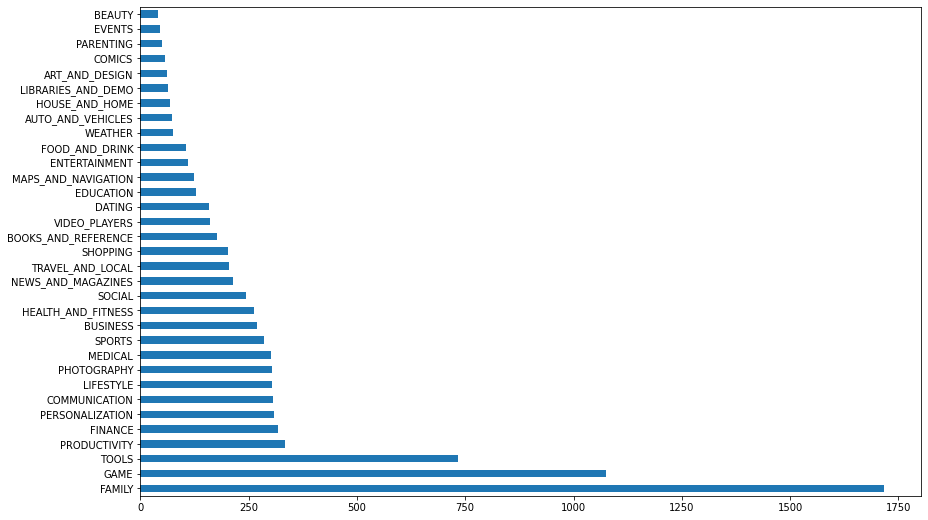

In [ ]:
x=df.Category.value_counts().plot(kind='barh',figsize= (14,9))


Inference : Maximium number of apps belong to the Family and Game category

Rating

In [ ]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Density'>

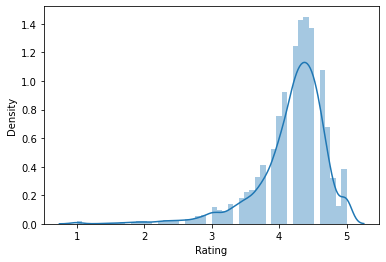

In [ ]:
sns.distplot(df.Rating)

Insight : Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating.

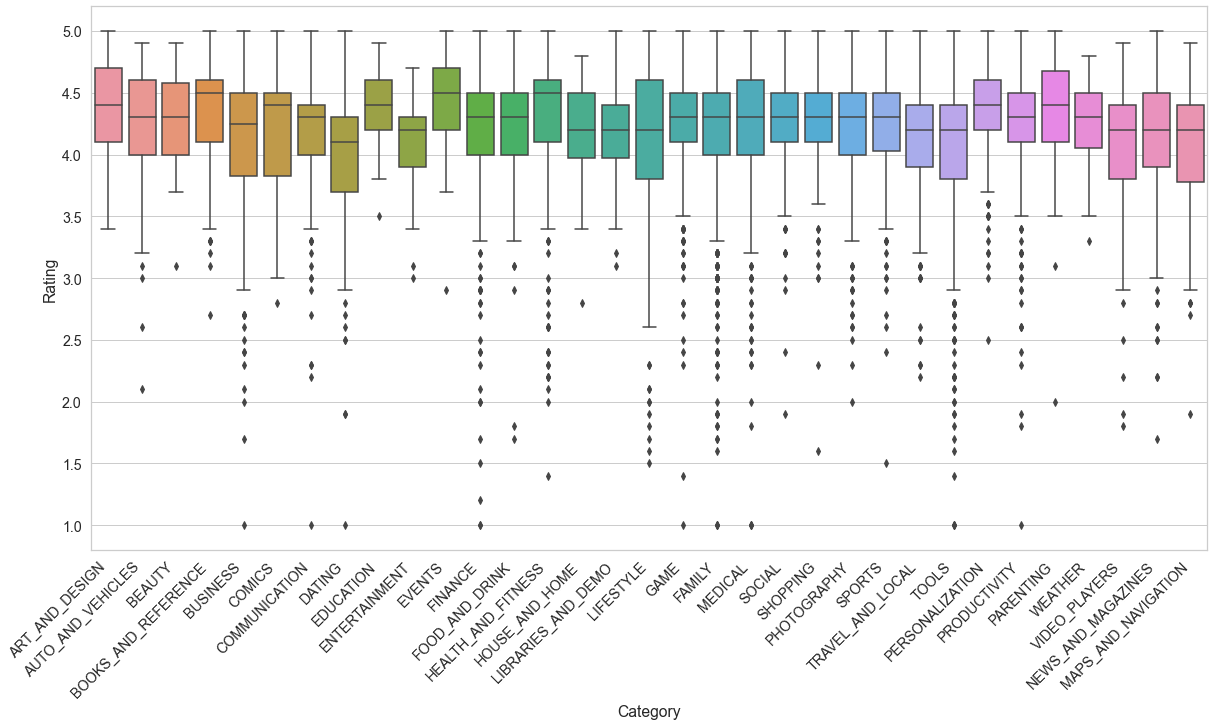

In [ ]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.3, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

In [ ]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


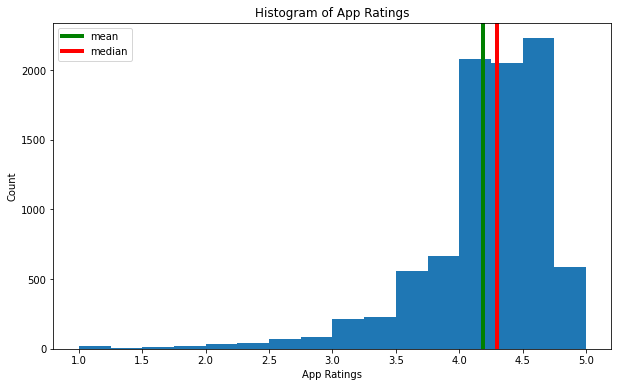

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df.Rating, range=(1,5), bins=16)
plt.axvline(x=df.Rating.mean(), linewidth=4, color='g', label="mean")
plt.axvline(x=df.Rating.median(), linewidth=4, color='r', label="median")
plt.xlabel("App Ratings")
plt.ylabel("Count")
plt.title("Histogram of App Ratings")
plt.legend(["mean", "median"])
plt.show()

Consider the reviews

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

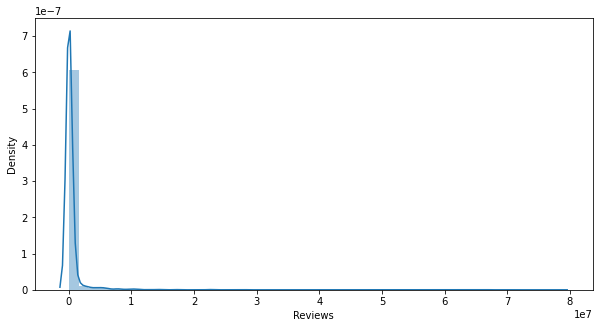

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

Let's look into those apps which have a good amount of Reviews

In [ ]:
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


 Insight: The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

Ques:  If an app has high number of installs, does it mean that it gets the more reviews from the users?

Text(0.5, 1.0, 'Distribution of Reviews for Popular Apps')

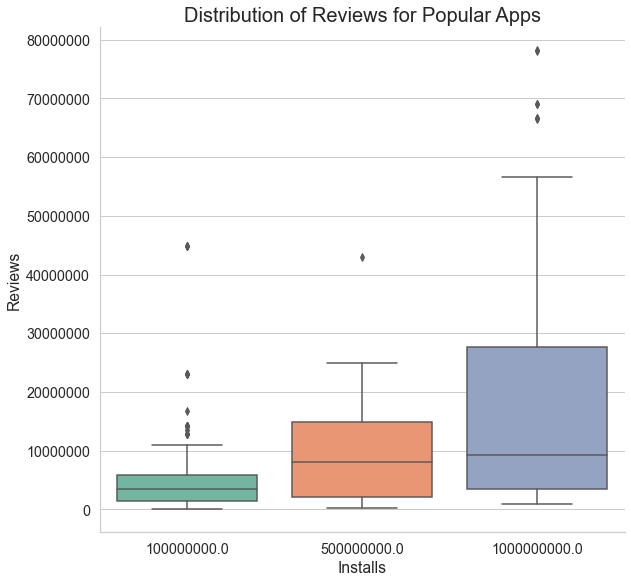

In [ ]:
#look at the distribution of the reviews per top-review install category
#since this a distribution per categorical data boxplot will be plotted
g = sns.catplot(x="Installs",
                y="Reviews",
                data=df[(df.Installs >=1000000000) | (df.Installs >=500000000) | 
                        (df.Installs >=100000000)], 
                kind="box", height = 8 ,palette = "Set2")
plt.ticklabel_format(style='plain', axis='y')
#g.set_yticklabels(["0","10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M"])
plt.title("Distribution of Reviews for Popular Apps", size=20)

Does every popular app (Installs 100M+) receives a review from each download ?

In [ ]:
df['Review_to_Install_Ratio'] = df.Reviews / df.Installs

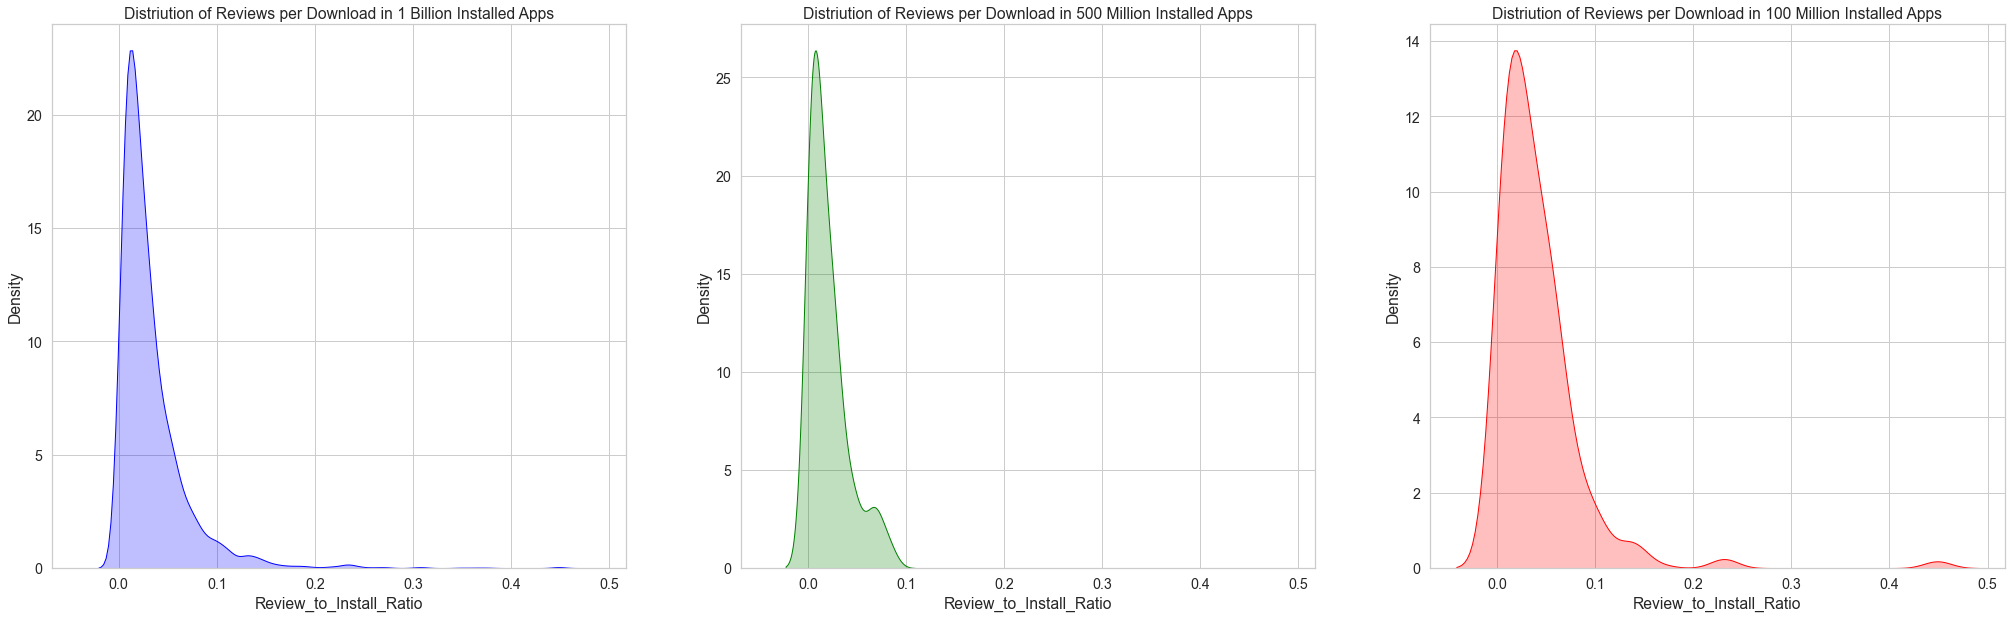

In [ ]:
#then plot the distribution per each popular install category
f, axes = plt.subplots(1, 3, figsize=(35, 10), sharex=True) #set the plotsize, divide plot into 3 columns

g1 = sns.kdeplot(df.Review_to_Install_Ratio[df.Installs>=1000000], shade=True, ax=axes[0], color="blue")
g1.title.set_text("Distriution of Reviews per Download in 1 Billion Installed Apps")

g2 = sns.kdeplot(df.Review_to_Install_Ratio[df.Installs>=500000000], shade=True, ax=axes[1], color="green")
g2.title.set_text("Distriution of Reviews per Download in 500 Million Installed Apps")

g3 = sns.kdeplot(df.Review_to_Install_Ratio[df.Installs >=100000000], shade=True, ax=axes[2],color="red")
g3.title.set_text("Distriution of Reviews per Download in 100 Million Installed Apps")


type

([<matplotlib.patches.Wedge at 0x164a75ce588>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

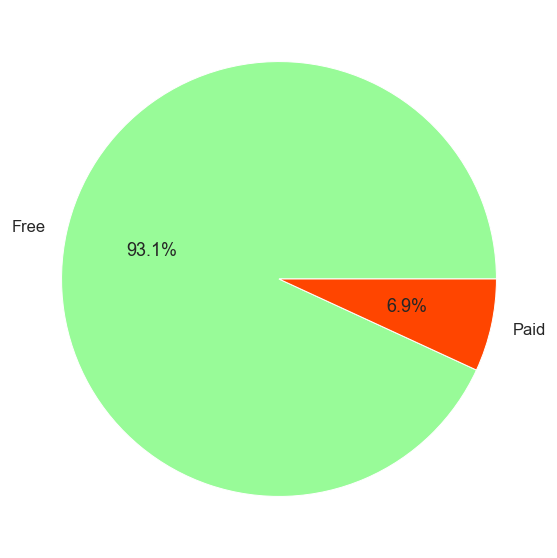

In [ ]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%',colors=["palegreen","orangered"])

What is the distribution of rating per number of installs and type (paid or free) ?

Text(0.5, 1.0, 'Ratings per Type and Install Category')

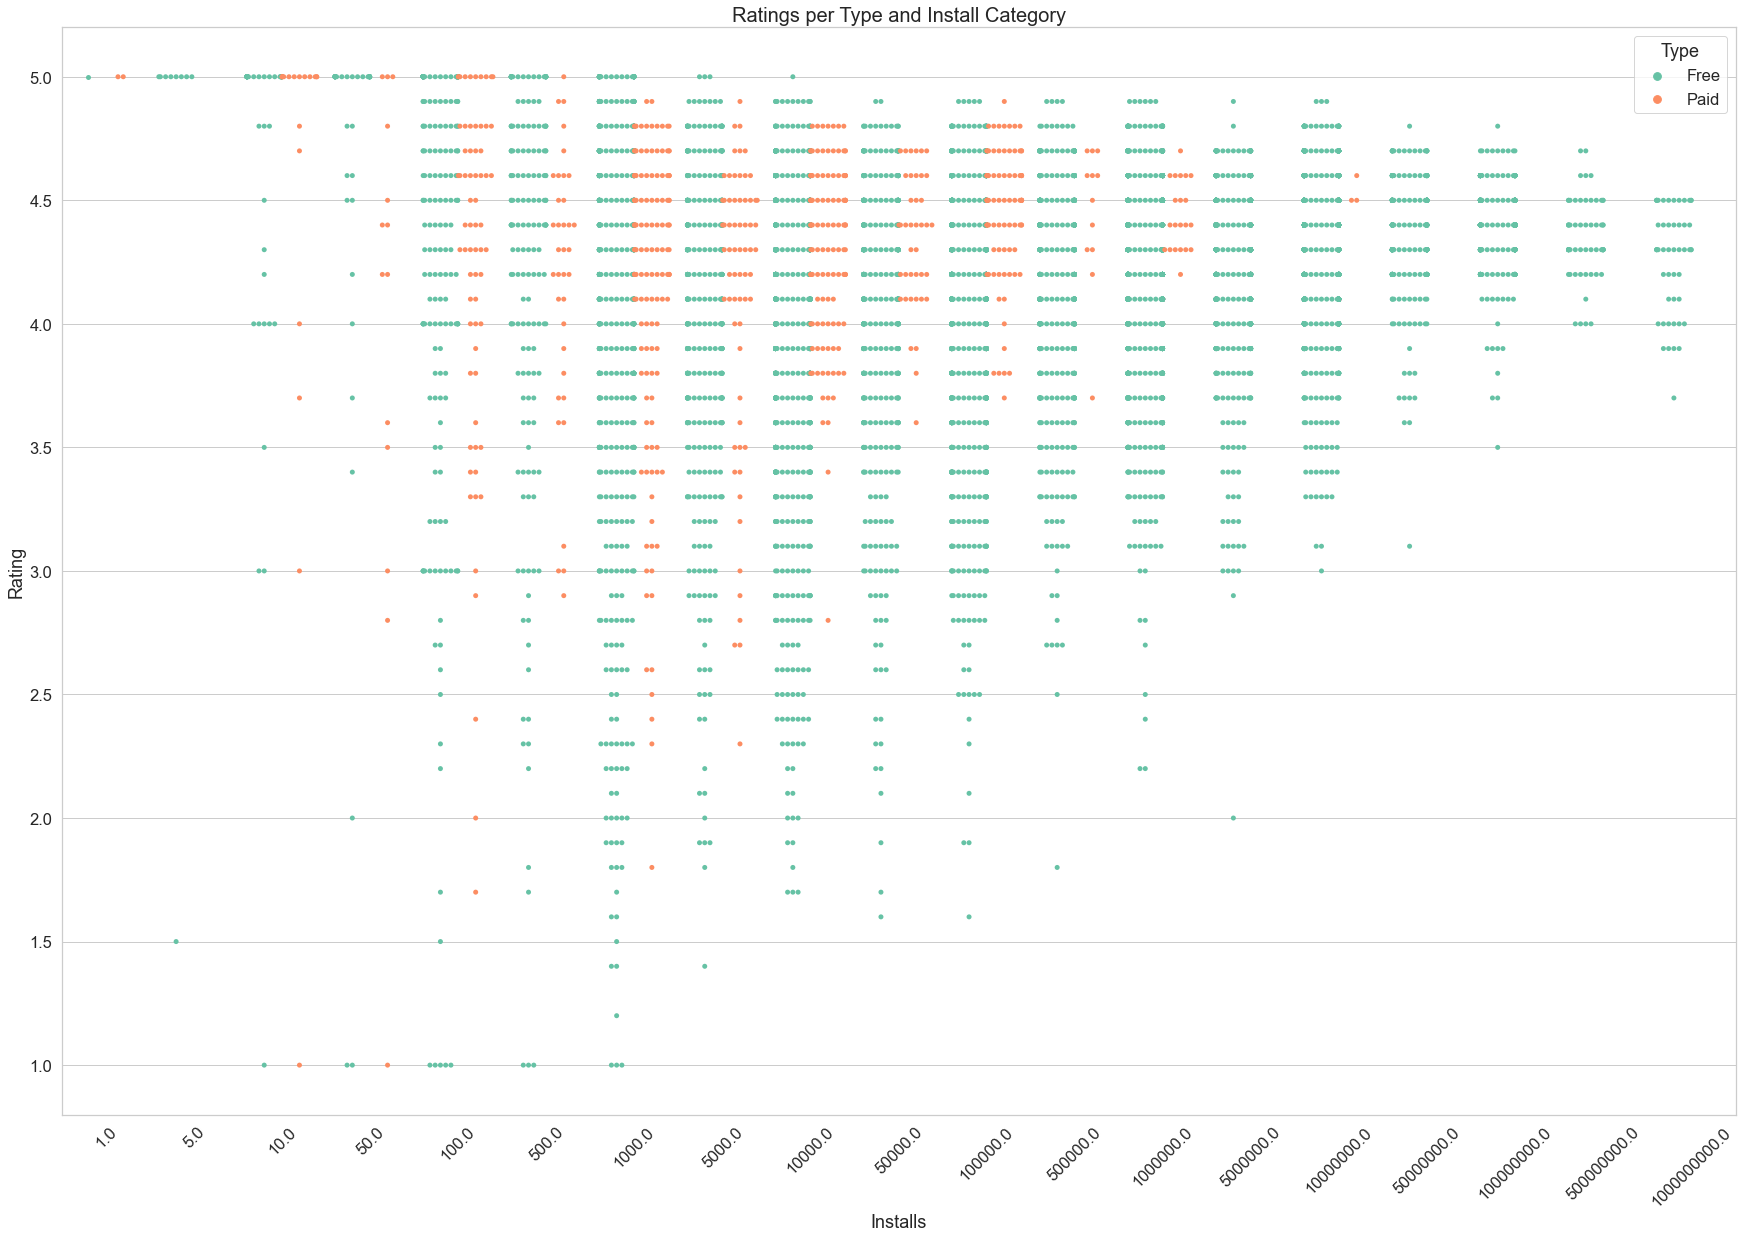

In [ ]:
#plot a swarmplot since there are multiple categories (Installs and Type)
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(30,20))
ax = sns.swarmplot(x="Installs", y="Rating", data=df, hue="Type", palette="Set2", dodge=True)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.title("Ratings per Type and Install Category", size=20)

Looks like rating is distributed around 4.5 when its categorized per install category
Google play store have very few paid apps

Price

In [ ]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review_to_Install_Ratio
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0,0.0275


The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars!

Do we have a correlation between price of the app and rating?

Text(0.5, 1.0, 'Price VS Rating')

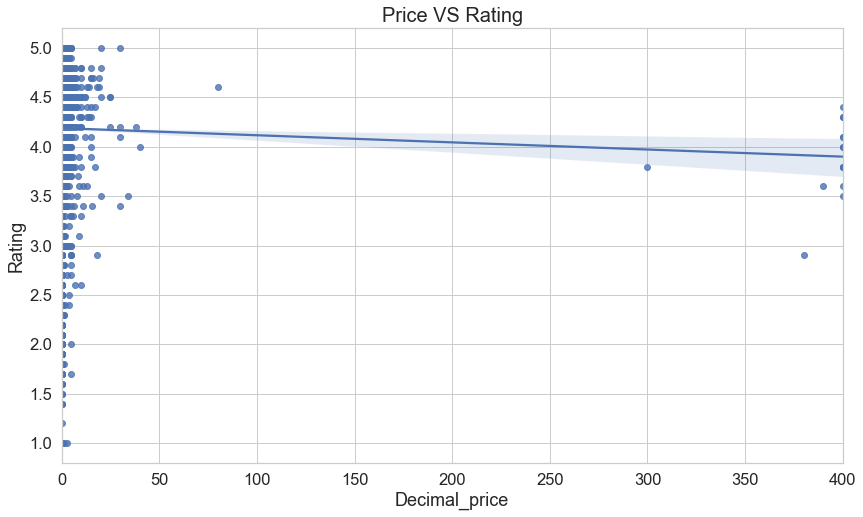

In [ ]:

df['Decimal_price'] = df.Price.replace(to_replace = '\$', value='', regex=True)
#add new column and remove special characters

df.Decimal_price = df.Decimal_price.astype('float')
#change to float

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Decimal_price", y="Rating", data=df)
plt.title("Price VS Rating", size=20)

Yes, as the price increases ratings received seems to decrease even below the average rating in the appstore
Looks like apps either has a price lower than 100, or price greater than 300

 Does the last update date has an effect on rating?

In [ ]:
from datetime import datetime as dt 

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object


Text(0.5, 1.0, 'Update Year VS Rating')

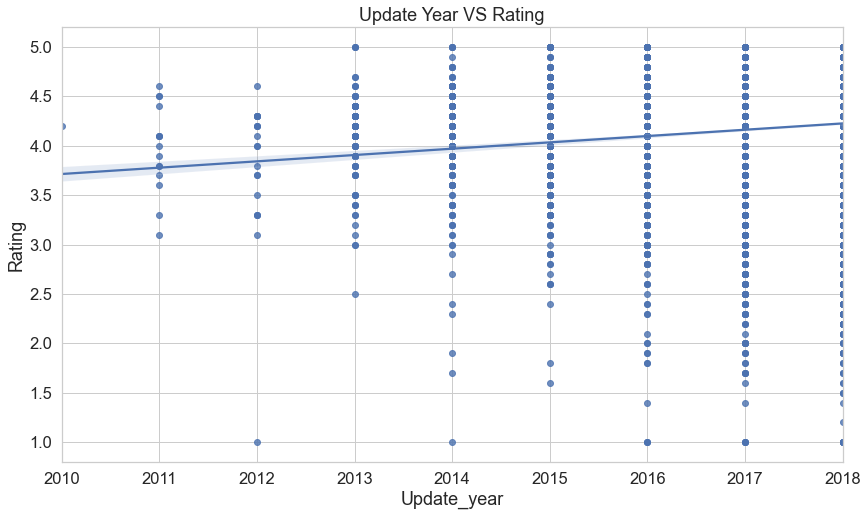

In [ ]:
print(df['Last Updated'].head())

#change the date column to a date format from object type
df["Update_date"] = df['Last Updated'].apply(lambda x: dt.strptime(x, '%B %d, %Y').date()) 

#fetch update year from date
df["Update_year"] = df["Update_date"].apply(lambda x: x.strftime('%Y')).astype('int64') 

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Update_year", y="Rating", data=df)
plt.title("Update Year VS Rating")

Update Year - Rating
looks like as the app gets more recent updates chances of getting a higher rating increases

 Which genres addresses which audience ?

In [ ]:
#divide genre columns and clean Content Rating
df["Main_genre"] = df.Genres.apply(lambda x: x.split(";")[0])
df["Sub_genre"] = df.Genres.apply(lambda x: x.split(";")[1] if x.find(";")>0 else "NA")
df["Content Rating"] =df["Content Rating"].replace(to_replace = 'Unrated', value='Everyone', regex=True)

Text(0.5, 1.0, 'Genre and Content Rating')

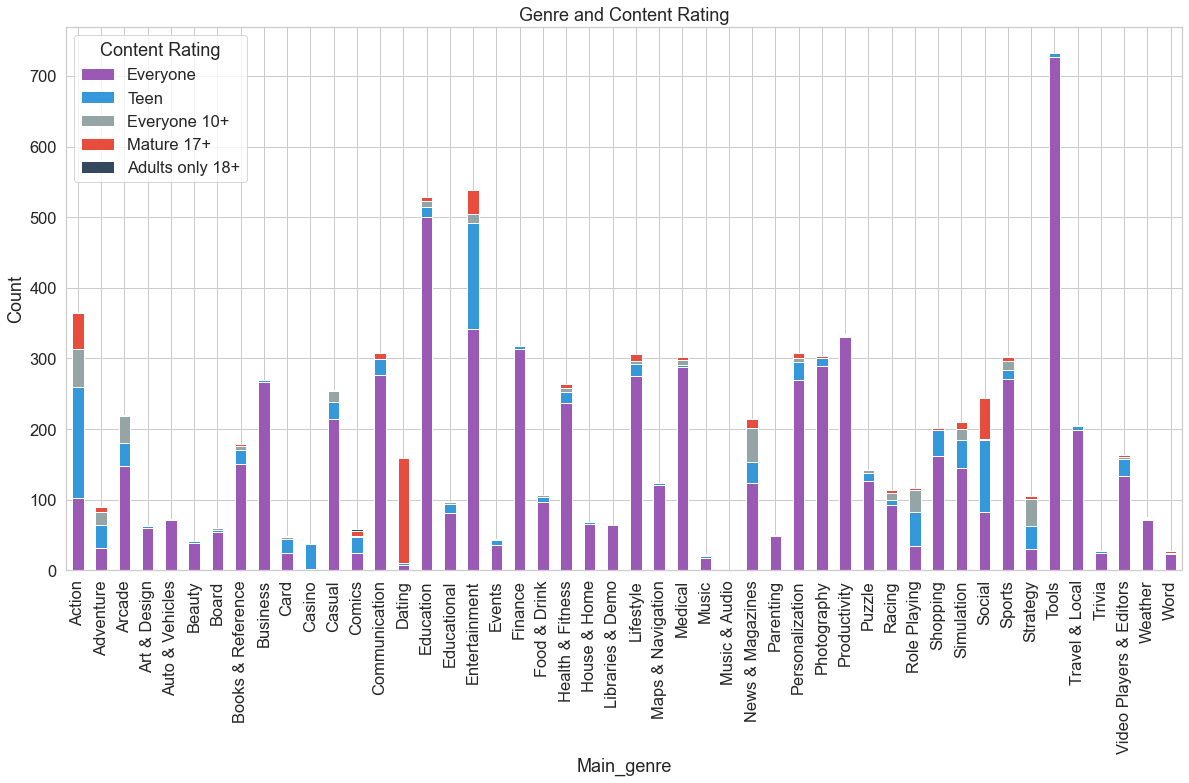

In [ ]:
#we are going to look at the data with the stacked bars with pandas dataframe
#create count view per main_genre and content rating
df_by_main_genre = df.groupby(["Main_genre", "Content Rating"]).count().reset_index().sort_values(
    by=["App"], ascending=False).reset_index()

#select relevant columns
df_by_main_genre= df_by_main_genre[["Main_genre", "Content Rating", "App"]]

#reshape data to plot stacked bars
df_pivoted = df_by_main_genre.pivot(columns="Content Rating", index="Main_genre", values="App")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
df_pivoted.loc[:,df["Content Rating"].unique()].plot.bar(stacked=True, color=colors, figsize=(20,10))
plt.ylabel("Count")
plt.title("Genre and Content Rating")

Almost every app genre is for everyone
But dating apps are for mostly for mature individuals rather than everyone :)
Actions genre is mostly for Teens

How sizes per genre differ?

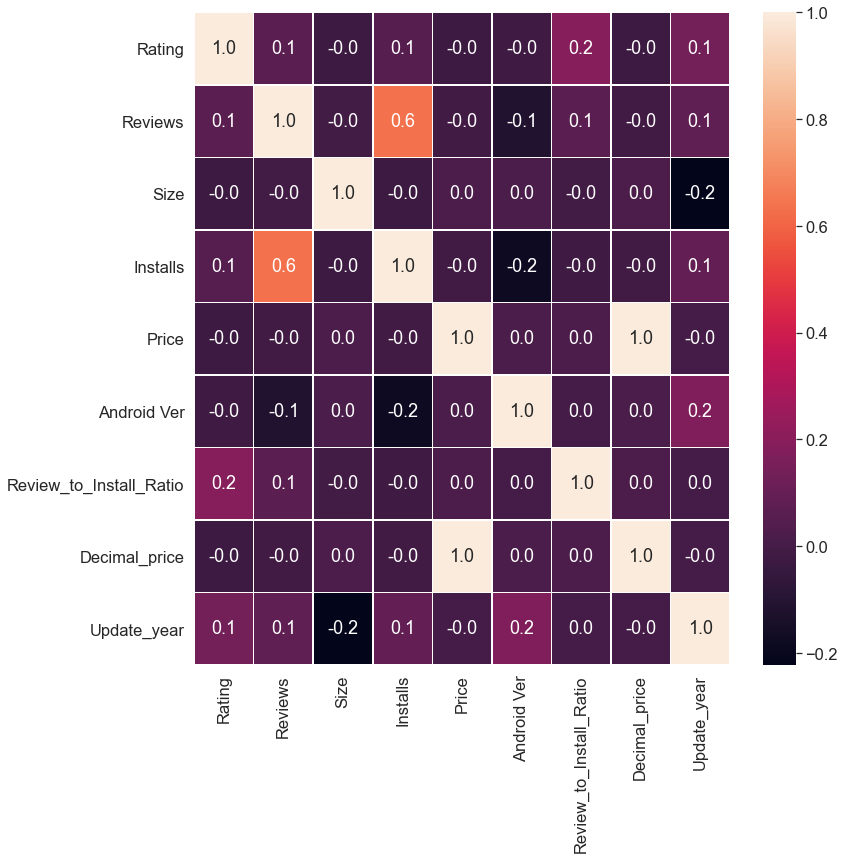

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# WORD CLOUD

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\preet\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [ ]:
from wordcloud import WordCloud

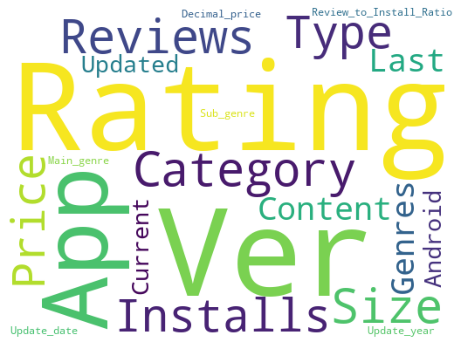

In [ ]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Predictive analysis

In [1]:
#conversion of size column to a convinient format
df["Size"] = df["Size"].apply(lambda x: str(x).replace(",", "") if "," in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace("Varies with device", "NAN") if "Varies with device" in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x:x.replace("+","")if "+" in str(x) else x)

NameError: ignored

In [ ]:
#convert size to float and replace 'NAN' in size column with mean of the column
df["Size"] = df["Size"].apply(lambda x:float(x))
df["Size"].fillna((df["Size"].mean()), inplace=True)

In [ ]:
#Install column with '+', ',' signs are removed to help easy computation
df["Installs"] = df["Installs"].apply(lambda x:x.replace("+","")if "+" in str(x) else x)
df["Installs"] = df["Installs"].apply(lambda x: x.replace(",","") if "," in str(x) else x)
df["Installs"] = df["Installs"].apply(lambda x:float(x))


In [ ]:
df.to_csv(path+"result1_play_store.csv", encoding='utf-8', index=False)

In [ ]:
#Converting Type column to 1 (for paid) and 0 (for free) apps
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1
df['Type'] = df['Type'].map(type_cat)

In [ ]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

In [ ]:
#Make the price column consistent by removing the '$' symbol and replacing "Free" with 0
df["Price"] = df["Price"].apply(lambda x: x.replace("Free",0) if "Free" in str(x) else x)
df["Price"] = df["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)
df["Price"] = df["Price"].apply(lambda x: float(x))
df["Price"].dtype

In [ ]:
df['Category_C'] = df['Category']

In [ ]:
df_copy = df.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in columns and converting the type
df_copy['Category'] = label_encoder.fit_transform(df_copy['Category']) 
df_copy['Content Rating'] = label_encoder.fit_transform(df_copy['Content Rating']) 
df_copy['Genres'] = label_encoder.fit_transform(df_copy['Genres']) 
df_copy.dtypes

In [ ]:
df_copy.head()

In [ ]:
df_copy = df_copy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)

In [ ]:
df_copy.to_csv(path+"result_play_store.csv", encoding='utf-8', index=False)

In [ ]:
print("There are {} total rows.".format(df_copy.shape[0]))
count_popular = df_copy[df_copy["Installs"] > 100000].count()

print("{} have High Install popularity !".format(count_popular[0]))
print("{} have Low Install popularity !\n".format((df_copy.shape[0]-count_popular)[0]))

#print("For an 80-20 training/test split, we need about {} apps for testing\n".format(google_apps_copy.shape[0]*.20))

df_copy["Installs"] = (df_copy["Installs"] > 100000)*1 #Installs Binarized

#print("Cut {} apps off Popular ones for a total of 3558 Popular training apps.".format(int(4568*.22132)))
#print("Cut {} apps off Unpopular ones for a total of 3558 Unpopular training apps.\n".format(int(4324*.17738)))

In [ ]:
df_copy.shape

In [ ]:
testing_popular1 = df_copy[df_copy["Installs"] == 1].sample(1010,random_state=0)
df_copy = df_copy.drop(testing_popular1.index)
#print("Values were not dropped from training dataframe.",testing_popular1.index[0] in google_apps_copy.index)

testing_popular0 = df_copy[df_copy["Installs"] == 0].sample(766,random_state=0)
df_copy = df_copy.drop(testing_popular0.index)
#print("Values were not dropped from training dataframe.",testing_popular0.index[0] in google_apps_copy.index)

In [ ]:
train_df = df_copy
test_df = testing_popular1.append(testing_popular0)

#Shuffle rows in test & training data set
test_df = test_df.sample(frac=1, random_state=0).reset_index(drop=True)
test_df= test_df.sample(frac=1, random_state=0).reset_index(drop=True)

In [ ]:
#Form training and test data split
y_train = train_df.pop("Installs")
X_train = train_df.copy()
y_test = test_df.pop("Installs")
X_test = test_df.copy()

In [ ]:
#Run with different ML model to check the accuracy
X_train = X_train.drop(['Category_C'], axis=1)
X_test = X_test.drop(['Category_C'], axis=1)

In [ ]:
print("{} apps are used for Training.".format(y_train.count()))
print("{} apps are used for Testing.".format(y_test.count()))
X_test.head()

# DECISION TREE

In [ ]:
#DECISION TREE

classify_DT = DecisionTreeClassifier(max_leaf_nodes = 29, random_state = 0) #max_leaf_nodes signifies no. of nodes
classify_DT.fit(X_train, y_train)
predict_popular_DT = classify_DT.predict(X_test)
print("Predicted: ",predict_popular_DT[:30])
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_popular_DT))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       766
           1       0.96      0.92      0.94      1010

    accuracy                           0.93      1776
   macro avg       0.93      0.93      0.93      1776
weighted avg       0.93      0.93      0.93      1776



In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, predict_popular_DT)
print(cm1)

[[725  41]
 [ 80 930]]


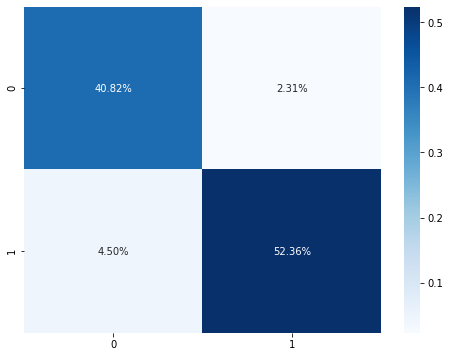

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm1/np.sum(cm1), annot=True, 
            fmt='.2%', cmap='Blues')

# Random Forest

In [ ]:
classify_RF = RandomForestRegressor(n_estimators = 100 , random_state = 0)   #n_estimators is no of trees in forest
classify_RF.fit(X_train , y_train)
predict_popular_RF = classify_RF.predict(X_test)
print("Predicted: ",predict_popular_RF[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [ ]:
acc_RF = accuracy_score(y_true = y_test, y_pred = predict_popular_RF.astype("int64"))
print("Accuracy of Linear Regression : ", (acc_RF*100).astype("int64").astype("int64"),"%")

Accuracy of Linear Regression :  85 %


In [ ]:
print('R square value : ',r2_score(y_test, predict_popular_RF))

R square value :  0.8246838745702246


# Linear Regression

In [ ]:
classify_LR1 = LinearRegression()
classify_LR1.fit(X_train , y_train)
predict_popular_LR1 = classify_LR1.predict(X_test)
print("Predicted: ",predict_popular_LR1[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [ ]:
acc_LR = accuracy_score(y_true = y_test, y_pred = predict_popular_LR1.astype("int64"))
print("Accuracy of Linear Regression : ", (acc_LR*100).astype("int64").astype("int64"),"%")

Accuracy of Linear Regression :  43 %


In [ ]:
print('R square value : ',r2_score(y_test, predict_popular_LR1))

R square value :  0.1319487125136758


# Logistic Regression

In [ ]:
#LOGISTIC REGRESSION

classify_LR = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
classify_LR.fit(X_train , y_train)
predict_popular_LR = classify_LR.predict(X_test)
print("Predicted: ",predict_popular_LR[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_popular_LR))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       766
           1       0.98      0.90      0.93      1010

    accuracy                           0.93      1776
   macro avg       0.93      0.93      0.93      1776
weighted avg       0.93      0.93      0.93      1776



In [ ]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, predict_popular_LR)
print(cm2)


[[743  23]
 [104 906]]


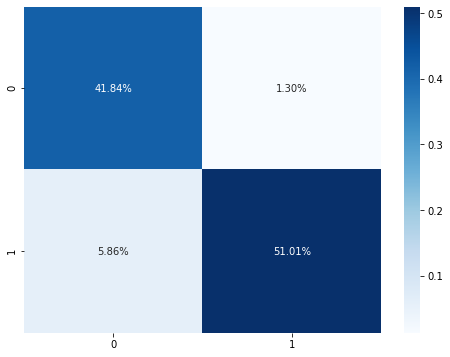

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Blues')

# Naive Bayes

In [ ]:

#NAIVE BAYES

classify_NB = GaussianNB()
classify_NB.fit(X_train, y_train)
predict_popular_NB = classify_NB.predict(X_test)
print("Predicted: ",predict_popular_NB[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_popular_NB))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       766
           1       0.99      0.79      0.88      1010

    accuracy                           0.87      1776
   macro avg       0.88      0.89      0.87      1776
weighted avg       0.90      0.87      0.87      1776



In [ ]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, predict_popular_NB)
print(cm4)


[[755  11]
 [213 797]]


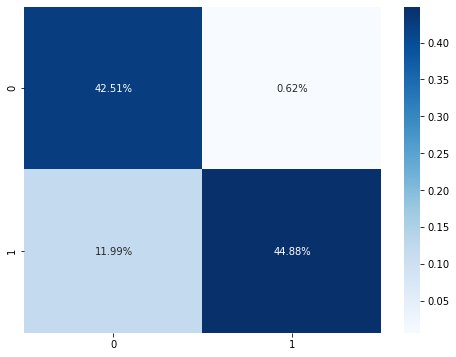

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm4/np.sum(cm4), annot=True, 
            fmt='.2%', cmap='Blues')

# KNN

In [ ]:
#K NEAREST NEIGHBORS

classify_KNN = KNeighborsClassifier(n_neighbors=15)
classify_KNN.fit(X_train, y_train)
predict_popular_KNN = classify_KNN.predict(X_test)
print("Predicted: ",predict_popular_KNN[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_popular_KNN))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       766
           1       0.94      0.91      0.93      1010

    accuracy                           0.92      1776
   macro avg       0.92      0.92      0.92      1776
weighted avg       0.92      0.92      0.92      1776



In [ ]:
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, predict_popular_NB)
print(cm5)

[[755  11]
 [213 797]]


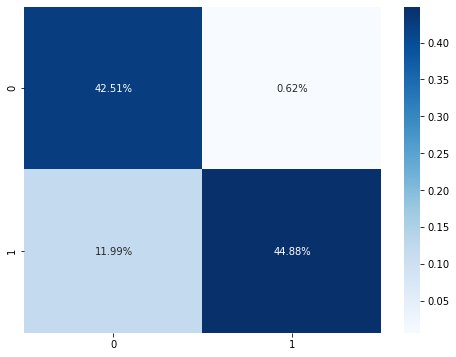

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm5/np.sum(cm5), annot=True, 
            fmt='.2%', cmap='Blues')

# Artificial Neural Networks

In [ ]:
#Artificial Neural Network

classify_ANN = MLPClassifier(solver='lbfgs', alpha=0.5, hidden_layer_sizes=(5, 3), random_state=0)
classify_ANN.fit(X_train, y_train)
predict_popular_ANN = classify_ANN.predict(X_test)
print("Predicted: ",predict_popular_ANN[:30].astype("int64"))
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual:     [0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_popular_ANN))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60       766
           1       0.00      0.00      0.00      1010

    accuracy                           0.43      1776
   macro avg       0.22      0.50      0.30      1776
weighted avg       0.19      0.43      0.26      1776



In [ ]:
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, predict_popular_NB)
print(cm6)

[[755  11]
 [213 797]]


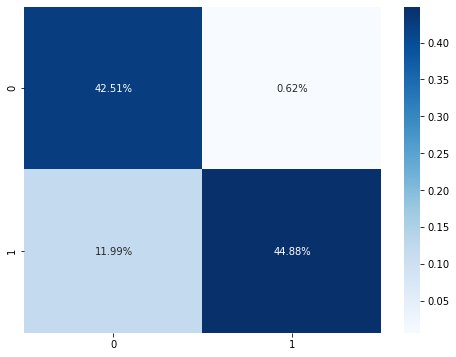

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm6/np.sum(cm6), annot=True, 
            fmt='.2%', cmap='Blues')